In [1]:
from PIL import Image
from google.colab import files
import torch
import numpy as np
import gdown
gdown.download(f'https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb', 'best_model.pt', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb
From (redirected): https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb&confirm=t&uuid=699bf197-bd89-4c8f-ac4b-533054d545a9
To: /content/best_model.pt
100%|██████████| 58.4M/58.4M [00:00<00:00, 58.7MB/s]


'best_model.pt'

In [2]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving photo.jpg to photo.jpg


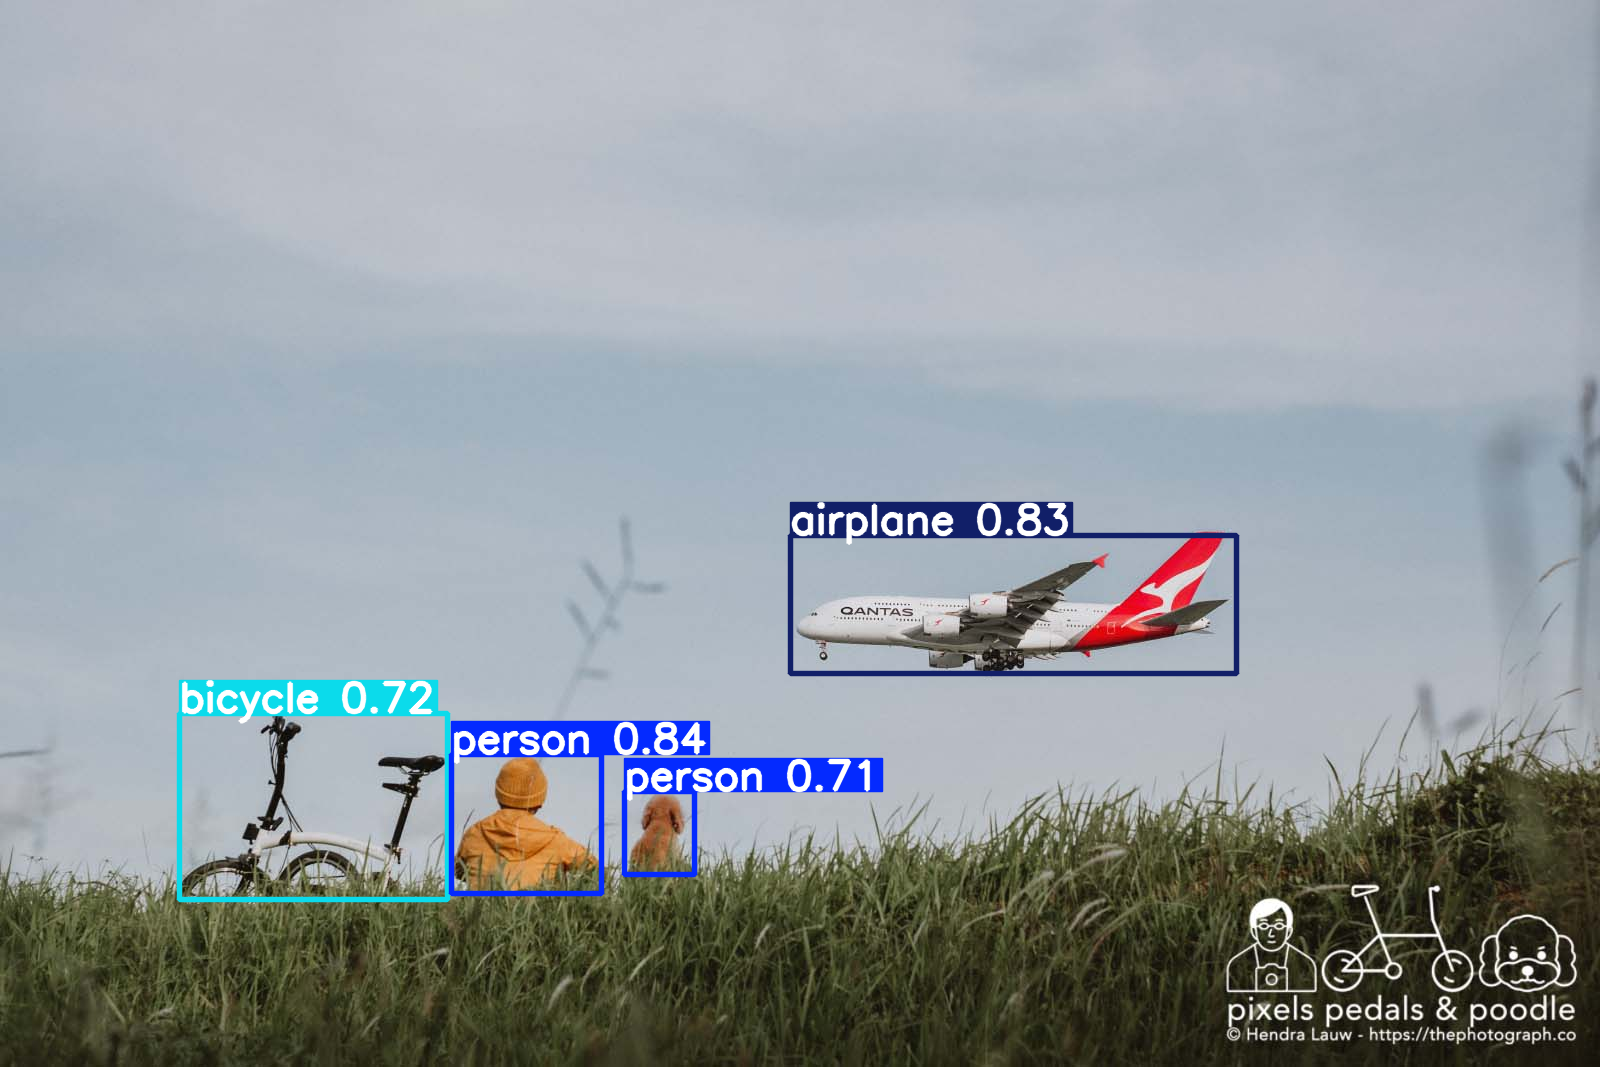

In [ ]:
# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best_model.pt', force_reload=True)

# Ask the user to upload an image
uploaded = files.upload()

# Get the image file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = Image.open(image_path)
image = np.array(image)

# Perform inference
results = model(image)
results.show()

Video file

In [1]:
import cv2
import torch
from google.colab import files

# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best_model.pt', force_reload=True)

# Ask the user to upload a video
uploaded = files.upload()

# Get the video file name
video_path = list(uploaded.keys())[0]

# Open the video file
cap = cv2.VideoCapture(video_path)

# Video yazmaq üçün hazırlıq (çıxış faylının adı və ölçüləri)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)  # Giriş videosunun FPS-i
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Giriş videosunun eni
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Giriş videosunun hündürlüyü
output_path = '/content/output_with_detections.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results.render()[0]  # Modelin aşkar etdiyi obyektləri çərçivəyə yerləşdir

    # Write the frame with detections to the output video
    out.write(annotated_frame)

# Release the video capture and writer objects
cap.release()
out.release()

print(f"Results saved to {output_path}")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-9-5 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving bear_goat.mp4 to bear_goat.mp4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/co

Results saved to /content/output_with_detections.mp4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
